In [ ]:
#librosa
# Fourier transformation
# In case of DL spectrogram , mel-spectogram , Mel-Frequesncy Cepstral Coefficent(MFCC) are used as DL will extract the 
#   feature by its own.


# Spectogram : 
* It is a visual representation of spectrum of frquecy of audio varies with time.
* Includes both frequency and time.
* This spectogram is obtained by **Short-time Fourier Transform on the audio signal** by applysing **Fast Fourier Transform(FFT)** in loacl small framed audio signal.
---
# Mel-Spectogram:

*     As an example we can easily differentaite between the 500Hz and 1000Hz audio frequency signal,But in case of higher frequency like between 10000Hz and 10100Hz audio frequency signal.For this reason a logarithmic scale "MEL" was introduced.
*     Conversion from frequency (f) to mel scale (m) is given by  m=2595 \cdot log(1+\frac{f}{500}) 
---
# MFCC :

![MFCC](https://devopedia.org/images/article/340/9044.1621765887.png)

* The information of the rate of change in spectral bands of a signal is given by its cepstrum.  A cepstrum is basically a spectrum of the log of the spectrum of the time signal. The resulting spectrum is neither in the frequency domain nor in the time domain and hence, it was named the quefrency (an anagram of the word frequency) domain. The Mel-Frequency Cepstral Coefficients (MFCCs) are nothing but the coefficients that make up the mel-frequency cepstrum.

* The cepstrum conveys the different values that construct the formants (a characteristic component of the quality of a speech sound) and timbre of a sound. MFCCs thus are useful for deep learning models.

## Some others feature extraction process : 

1. Band Energy Ratio :
    * The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. It can be thought of as the measure of how dominant low frequencies are. This feature has been extensively used in music/speech discrimination, music classification etc.


In [1]:
! pip install librosa 
! pip install IPython

In [2]:
import librosa
import matplotlib.pyplot as plt

In [3]:
# angry voice
audio_path="../input/audio-emotions/Emotions/Angry/03-01-05-01-01-01-01.wav"
time_series_array,sampling_rate=librosa.load(audio_path,sr=44000)

In [ ]:
# fearful voice
audio_path="../input/audio-emotions/Emotions/Fearful/03-01-06-01-01-01-01.wav"
time_series_array,sampling_rate=librosa.load(audio_path,sr=44000)

In [ ]:
time_series_array 

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

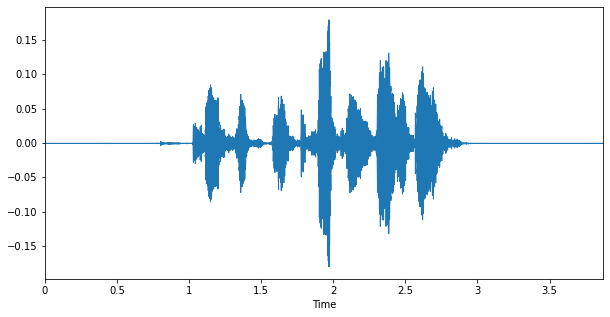

In [5]:
# waveplot
%matplotlib inline
import librosa.display
plt.figure(figsize=(10,5))
librosa.display.waveplot(time_series_array,sr=sampling_rate)

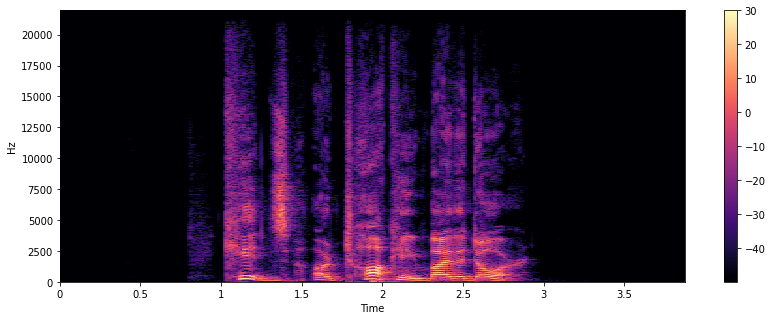

In [6]:
# spectogram plot
# short time fast fourier tranform

stft_time_series=librosa.stft(time_series_array)
time_series_db=librosa.amplitude_to_db(abs(stft_time_series))
# time_series_db[0]
plt.figure(figsize=(14,5))
librosa.display.specshow(time_series_db, sr=44000, x_axis='time', y_axis='hz') 
plt.colorbar()

In [7]:
import numpy as np

## window_length : 
we need to split the audio clips into various windows of constant frame length and have them cumulatively processed. We call this length as ‘window length’.
## hop_length :
As it is an audio file and to preserve the continuity while processing — we let some frames from subsequent windows to overlap with one another and the actual unique count of frames processed per window is known as ‘hop length’.
## sampling_rate :
The sampling rate is nothing but samples taken per second

In [57]:
class extract_feature:
    def __init__(self,audio_file,sampling_rate):
        self.audio_file=audio_file
        self.sampling_rate=sampling_rate
    def zero_crossing_rate(self):
        # 1.zero crossing rate : the rate at whichthe signal changes to positive from negative and vice-versa.
        zero_crossed_array=librosa.feature.zero_crossing_rate(self.audio_file,pad=False,zero_pos=True) 
#         plt.figure(figsize=(15, 3))
#         plt.plot(zero_crossed_array.T)
        return zero_crossed_array[0]
    def spectral_centroid(self):
        # it actualluy indicate the center of the mass of that whole sound based upon the frequecy.
        # If there are high frequencies at the end of sound then the centroid would be towards its end.
        spectral_centroid=librosa.feature.spectral_centroid(self.audio_file, sr=self.sampling_rate)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_centroid[0])
        return spectral_centroid[0]
    def mfcc(self):
#         mfcc is nothing but a coeeficent that actaully makes upto mel-scal(log scale representation to detect small
#         frequency changes).Here frequency bands are represnted by mel scale and we are able to see frq. change easily.
        mfcc=librosa.feature.mfcc(self.audio_file,sr=self.sampling_rate)
#         librosa.display.specshow(mfcc, sr=self.sampling_rate, x_axis='time')
        return mfcc
    def chroma(self):
#         We can use Chroma feature visualization to know how dominant the characteristics of a certain pitch 
#        {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is present in the sampled frame.
        hop_length = 1024
        chromagram = librosa.feature.chroma_stft(self.audio_file, sr=self.sampling_rate, hop_length=hop_length)
#         fig, ax = plt.subplots(figsize=(15, 3))
#         img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
#         fig.colorbar(img, ax=ax)

        return chromagram
        
    def band_energy_ratio(self):
#         The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. 
#         It can be thought of as the measure of how dominant low frequencies are.
#         This feature has been extensively used in music/speech discrimination, music classification etc.
#         High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.
         ber=librosa.feature.spectral_contrast(self.audio_file,sr=self.sampling_rate,n_fft=4096, hop_length=1024)
#          plt.figure(figsize=(15, 3))
#          plt.plot(ber[0])
         return ber[0]
    def spectral_flux(self):
#         A measure of how quickly the spectrum of a signal is changing. It is calculated by computing frame-to-frame
#         squared difference of the spectral magnitude vector summed across frequency.It provides a measure of the local
#         spectral rate of change. A high value of spectral flux indicates a sudden change in spectral magnitudes and
#         therefore a possible segment boundary at the  rth  frame.
        
        spec_flux= librosa.onset.onset_strength(self.audio_file,sr=self.sampling_rate)
#         onset_default = librosa.onset.onset_detect(self.audio_file,sr=self.sampling_rate, units='time')
#         plt.figure(figsize=(15, 3))
#         plt.plot(spec_flux)
        return spec_flux
    def spectral_rolloff(self):
#         Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
        spectral_rolloff=librosa.feature.spectral_rolloff(self.audio_file,sr=self.sampling_rate,n_fft=4096,
                                                          hop_length=1024,roll_percent=0.85)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_rolloff[0])
        return spectral_rolloff[0]
    def rms(self):
#         Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.
        rms_val=librosa.feature.rms(self.audio_file,frame_length=2048,hop_length=1024)
#         plt.figure(figsize=(15, 3))
#         plt.plot(rms_val[0])
        return rms_val[0]


#     Harmonics and Perceptrual
#     Tempogram

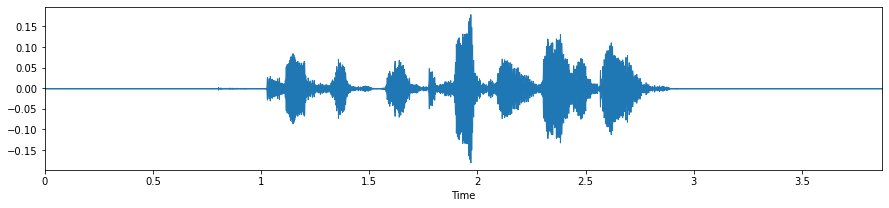

In [58]:
ex=extract_feature(time_series_array,44000) 
# ex.zero_crossing_rate()
# ex.spectral_centroid()
# ex.mfcc()
# ex.chroma()
# ex.band_energy_ratio()
# ex.spectral_rolloff()
# ex.rms()
# ex.spectral_flux()


import librosa.display
plt.figure(figsize=(15,3))
librosa.display.waveplot(time_series_array,sr=sampling_rate)


Centroids: [    0.             0.         10419.08001169 10431.33217079
 10450.92576753 10461.69612072 10516.63546602     0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
 10536.93671163 10452.48226733 10334.35176249 10326.20020445
 10417.43318402  9457.41826352  9442.69168177  9740.49049022
 10438.08096059 10327.9526164  10083.94447914  9753.68631671
  9732.97054642  9553.67298892  9482.88778218  9467.68462954
  9401.91597341  9349.63619527  9393.61907312  9649.97546836
  9633.54754406  9303.89473426  9396.29198279  9389.59512436
  9471.2128984   9401.86985457  9366.32049189  9404.36325461
  9516.80933721  9621.83246905  9827.4569831   9764.47236352
  9679.03417229  9617.90978406  9629.90166448  9640.77707664
  9454.34035392  9849.90771768  9752.42897271  9413.52390645
  9677.84163709  9165.68929919  8774.78308303  9225.40723628
  9442.14151718  9894.36557146 10970.74165864

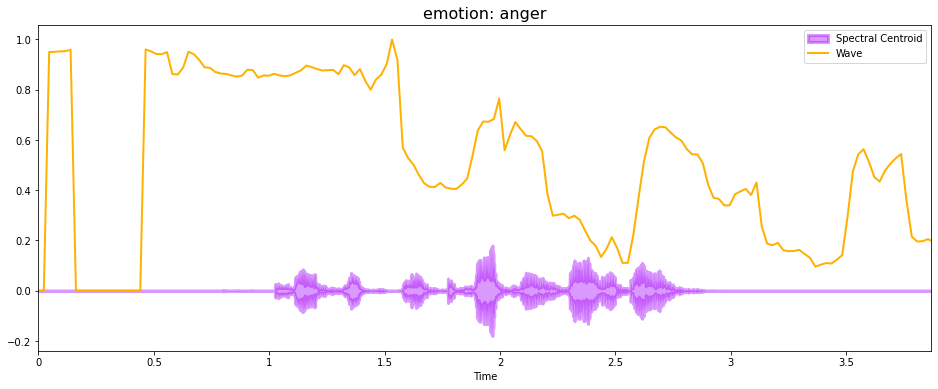

In [59]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(time_series_array, sr=sampling_rate)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(time_series_array, sr=sampling_rate, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("emotion: anger", fontsize=16);